## Ingesting Spotify Data

This is an exploratory notebook working with json files

The first step is importing the data
resources:
https://docs.python.org/3/library/json.html

In [8]:
import json
from pathlib import Path

In [19]:
g1path = Path("genres1.json")
g1 = json.loads( open(g1path).read() )

In [28]:
#explore output
print(type(g1)) #its a list
print(type(g1[0])) #of dictionaries
print( "number of songs:", len(g1) ) 
print(g1[0].keys()) #with these keys

<class 'list'>
<class 'dict'>
number of songs: 2950
dict_keys(['key', 'id', 'time', 'artist', 'album', 'genres'])


In [32]:
#whats in a song?
for k,v in g1[0].items():
    print(k, " : ", v)

key  :  1
id  :  337H7R2AWIlI9s7M4ugelQ
time  :  2020-07-10T18:35:44Z
artist  :  4tF39UYlbBLqTo5JK3qX1u
album  :  6bauY7PwZaNP7NoXczbKBl
genres  :  ['glitchcore']


## Counting Genres
First step is to count the genres and plot summary stats

First question: How many songs are in each genre?

Method:
for each song,
    for each genre,
        add or increment dictionary
        
Sort
Plot has histogram

In [36]:
from collections import OrderedDict
import 

In [33]:
gdict = dict()

In [34]:
for song in g1:
    for genre in song['genres']:
        if genre in gdict:
            gdict[genre] += 1
        else:
            gdict[genre] = 1

In [40]:
sorted_gdict = OrderedDict(sorted( gdict.items(), key = lambda x: x[1], reverse = True ))

In [45]:
#print top 10
top = 10
for k in list(sorted_gdict.keys())[:top]:
    print(k, ":", sorted_gdict[k])

indie rock : 659
indie pop : 622
rock : 578
modern rock : 505
art pop : 460
alternative rock : 460
permanent wave : 292
freak folk : 279
art rock : 234
escape room : 206


## Ploting the distribution

I'll start with the histogram

Consideration, adjust by the number of songs?

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# get number of songs
num_songs = len(g1)
#extract count from dictionary
counts = list( sorted_gdict.values() )
percents = [ c / num_songs for c in counts]

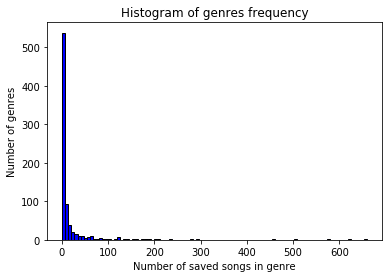

In [68]:
#histogram counts
fig1 = plt.figure(1)
plt.hist(counts, color = 'blue', edgecolor = 'black',
         bins = 100)
plt.title("Histogram of genres frequency")
plt.xlabel("Number of saved songs in genre")
plt.ylabel("Number of genres")

plt.show()

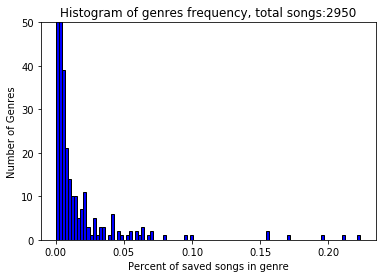

In [76]:
#histogram counts
fig1 = plt.figure(1)
plt.hist(percents, color = 'blue', edgecolor = 'black',
         bins = 100)
plt.title("Histogram of genres frequency, total songs:" + str(num_songs))
plt.xlabel("Percent of saved songs in genre")
plt.ylabel("Number of Genres")

#show higher frequency
cut = True
if cut:
    plt.ylim((0,50))

plt.show()

Now use a kernal density estimation:
https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0